**2019315036 허다희**

**생일 : 3/25**

---


**데이터 시각화 기말고사레포트**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 필요한 패키지 설치

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt
from collections import Counter
!pip install konlpy
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import urllib.parse
import urllib.request

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 폰트 설치 및 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
# 데이터 불러오기
# 2022년 3월 25일 기사 : 금리 인상기에 있는 대한민국, 주택 시장은 앞으로 어떻게 될까?
url = "https://raw.githubusercontent.com/dhdr0825/data_visualization/master/부동산_금리_뉴스.txt"  # 열고자 하는 URL

encoded_url = urllib.parse.quote(url, safe=':/')  # URL을 인코딩

with urllib.request.urlopen(encoded_url) as response:
    data = response.read()  # URL에서 읽은 데이터를 변수에 저장
    text = data.decode('utf-8')  # 데이터를 UTF-8로 디코딩
    print(text)  # 디코딩된 텍스트 출력 또는 다른 작업 수행

최근 금리 인상에 대한 얘기가 끊이지 않고 나오고 있다. 최근 3년간 유지되었던 저금리 기조 속에서 부동산시장은 ‘패닉바잉’이란 얘기가 나올 정도로 매수세는 계속되었고 지금이 아니면 내 집 마련이 힘들어 질 수 있다는 분위기 속에서 주택 가격은 끊임없이 상승했다.
영혼까지 끌어 모아 주택을 매입한다는 소위 ‘영끌족’이 양산됐던 시기, 역대 최고 주택 거래량이 나오던 시대, 그러한 저금리 시대가 끝나가고 있다.
앞으로의 금리가 계속 오른다면 우리나라 부동산 시장은 앞으로 어떤 모습을 보이게 될까?
작년 8월을 기점으로 시작된 금리인상이 지속적인 상승세를 유지하고 있다.
코로나 사태와 인플레이션은 아주 긴밀한 관계라고 볼 수 있다. 코로나 19로 전 세계는 유례없는 경제 셧다운에 들어가게 되었고 많은 이들은 일자리를 잃고, 가계와 기업은 속수무책으로 무너졌다.
미국은 자국 경제 부흥을 위해 7조 달러 라는 천문학적인 자금을 시장에 쏟아 부었고 모든 나라가 경제가 무너지지 않게 하기 위해서 많은 자금을 시장에 푼 것은 부정할 수 없는 사실이다. 그러나 바이러스로 인한 패닉 상황이 안정되며 경제가 회복세에 들어서자 여러 가지 문제가 발생하게 된다. 경제 회복세에 많은 기업들이 정상화를 위해 인력 공백을 메우려 구인을 시작했지만 코로나19가 바꾸어 놓은 삶에 대한 패러다임 앞에 필요인력들의 일터 복귀가 순조롭게 진행되지 않고 있다. 기계가 사람을 대체할 수 있는 시대라고 하지 않았던가. 하지만 아직도 많은 현장은 사람이 필요하다. 현장에 사람이 부족하게 되니 기업들의 업무 정상화도 지체되고 코로나19 이전으로 돌아가는 정상화에도 시간이 길어지고 있다.
이런 현상에 대해 뱅크몰의 관계자는 “인력난을 겪는 기업들은 물류의 이동에 큰 구멍이 생겨버렸고 물류가 원활하지 않으니 전 세계적인 경제 회복세에 수요를 공급이 따라가지 못하는 상황이 발생했다. 그 결과 천연가스, 석탄 등 모든 원자재 가격이 치솟고 인플레이션이 심화되는 상황이 모든 나라에서 지표로 보이고 있다. 거기에 

In [5]:
# 명사만 추출하여 확인
okt = Okt()
nouns = okt.nouns(text)
print(nouns)

['최근', '금리', '인상', '대한', '얘기', '최근', '유지', '금리', '기조', '속', '부동산', '시장', '패닉', '바잉', '이란', '얘기', '정도', '매수', '계속', '지금', '내', '집', '마련', '질', '수', '분위기', '속', '주택', '가격', '상승', '영혼', '주택', '매입', '소위', '끌족', '이', '양산', '시기', '역대', '최고', '주택', '거래량', '시대', '금리', '시대', '앞', '금리', '계속', '우리나라', '부동산', '시장', '앞', '모습', '보이', '작년', '기점', '시작', '금리', '인상', '지속', '상승세', '유지', '코로나', '사태', '인플레이션', '아주', '관계', '볼', '수', '코로나', '로', '전', '세계', '유례', '경제', '셧다운', '이', '일자리', '가계', '기업', '속수무책', '미국', '자국', '경제', '부흥', '위해', '달러', '천문학', '자금', '시장', '모든', '나라', '경제', '위해', '자금', '시장', '푼', '것', '부정', '수', '사실', '바이러스', '패닉', '상황', '안정', '경제', '회복', '세', '여러', '가지', '문제', '발생', '경제', '회복', '세', '기업', '정상화', '위해', '인력', '공백', '구인', '시작', '코로나', '삶', '대한', '패러다임', '앞', '필요', '인력', '일터', '복귀', '롭', '진행', '기계', '사람', '대체', '수', '시대', '현장', '사람', '현장', '사람', '기업', '업무', '정상화', '지체', '코로나', '이전', '정상화', '시간', '현상', '대해', '뱅크', '관계자', '인력', '난', '기업', '물류', '이동', '구멍', '물류', '전', '세계', '경제', '회복', '세', '수

In [6]:
# 단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1]

# 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터 생성
c = Counter(words)

In [7]:
# 딕셔너리 데이터 확인 (상위 15개)
from collections import Counter

most_common_items = c.most_common(15)  # 가장 빈도가 높은 15개 항목

for item, count in most_common_items:
    print(f"{item}: {count}")

금리: 14
주택: 12
인상: 11
시장: 11
인플레이션: 7
경제: 7
가격: 6
미국: 5
상황: 5
부동산: 4
분위기: 4
코로나: 4
기업: 4
위해: 4
최근: 3


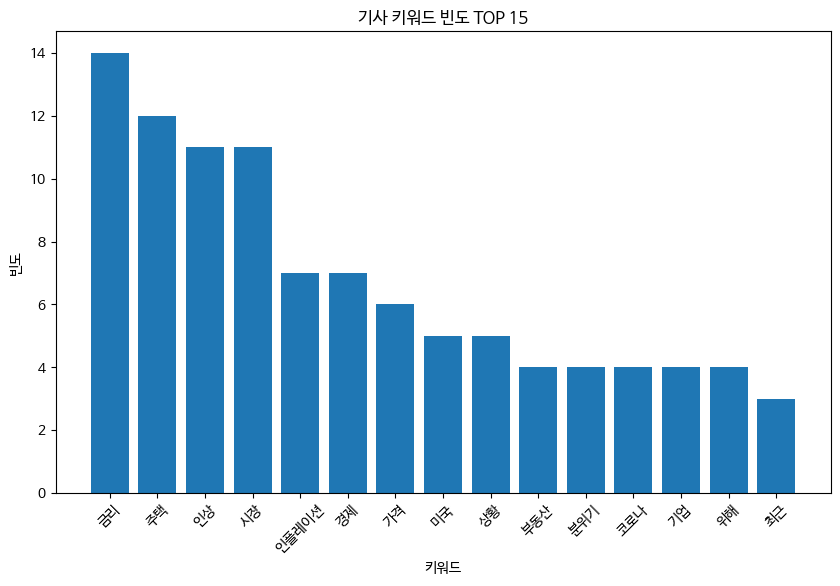

In [8]:
items, counts = zip(*most_common_items)  # 항목과 빈도를 분리

plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
plt.bar(items, counts)  # 막대 그래프 생성

plt.xlabel('키워드')  # x축 레이블 설정
plt.ylabel('빈도')  # y축 레이블 설정
plt.title('기사 키워드 빈도 TOP 15')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 레이블 회전

plt.show()  # 그래프 표시

# 워크클라우드

(-0.5, 1023.5, 1023.5, -0.5)

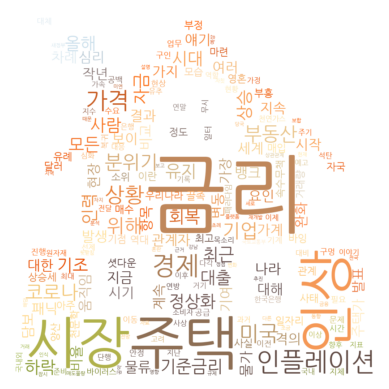

In [16]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 집 이미지의 색깔에 맞춰 워드클라우드 만들기
img = Image.open("/content/drive/MyDrive/mansion.png")
img_array = np.array(img)
house_color_mask = img_array

wc = WordCloud(font_path= font_path, background_color='white', width=800, height=800, scale=2.0, max_font_size=250, mask=house_color_mask)
gen = wc.generate_from_frequencies(c)

# ImageColorGenerator : 컬러 이미지 배열값의 컬러값을 가져옴
image_color = ImageColorGenerator(house_color_mask)

# recolor(color_func=이미지컬러제너레이터 객체) : 워드 클라우드를 그릴 새로운 색상을 적용!
newwc = wc.recolor(color_func=image_color, random_state=42)

plt.imshow(newwc, interpolation='bilinear')
plt.axis('off')

위의 워드클라우드에서 가장 크게 보이는 키워드는 **금리**, **주택**, **인상**, **시장**, **인플레이션** 입니다. 이 키워드들은 기사에서 주요하게 다루어진 주제와 관련된 내용을 나타냅니다. 키워드간의 관계를 살펴보겠습니다.

<br/>

---
---
<br/>

1) **금리 인상과 주택 시장의 관계**

일반적으로 저금리 시대 동안 주택 시장은 매수세가 지속되어 가격이 상승하게 됩니다. 저금리는 대출 조건이 유리해지고 주택 구매를 유도하는 요인이 되기 때문입니다. 그러나 금리가 상승한다면 주택 구매에 대한 부담이 커지고 대출 규제가 강화될 수 있습니다. 이는 주택 가격 상승을 일시적으로 완화시킬 수 있습니다. 따라서, 금리 변동은 주택 시장에 상당한 파급효과를 일으킬 수 있으며, 주택 구매자와 투자자에게 중대한 영향을 미칠 수 있습니다.
<br/><br/>
2) **금리 인상과 인플레이션의 관계**

경제가 회복세로 전환되면서 일자리가 증가하고 기업들의 경영 상황이 개선되는 경향을 보이고 있습니다. 이에 따라 국가들은 경기 부양을 위해 자금을 시장에 투입하고 있습니다. 그러나 경제의 빠른 회복은 인력 공급 부족과 인플레이션 문제를 야기할 수 있습니다. 인플레이션은 일반적으로 가격 상승을 의미하며, 원자재 가격 상승이나 물류 원활성 저하 등이 인플레이션을 가속화시킬 수 있습니다. 이를 통해 경제에 안정성을 유지하고 가격 안정성을 확보하기 위해 중앙은행들은 금리 인상을 검토하게 됩니다.

특히, 미국을 중심으로 금리 인상과 인플레이션 대응이 진행되고 있는데, 미국의 통화정책 변화는 한국을 비롯한 다른 국가에도 영향을 미칠 수 있습니다. 금융당국들은 국내 시장의 인플레이션 상황을 신중하게 고려하여 금리 조절을 검토하고 있습니다. 이는 주택 시장에 영향을 미치는 주요한 요소 중 하나입니다.
<br/><br/>
이와 같은 키워드 분석을 통해서, 주택 시장과 금리, 인플레이션 등의 요소들은 서로 깊게 연관되어 있다는 것을 알 수 있었습니다. 주택을 구매하거나 투자를 계획중인 사람들은 금리 변동에 대비하여 자신의 재정 상황을 분석하고, 장기적인 관점에서 주택 시장의 안정성과 가격 전망을 고려하여 현명한 결정을 내려야 합니다.